# New York City Taxi Fare Prediction

We'll train a machine learning model to predict the fare for a taxi ride in New York city given information like pickup date & time, pickup location, drop location and no. of passengers. 

Dataset Link: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction

## Outline for the project
1. Download The Dataset
2. Explore and Analyse the dataset
3. Prepare the dataset for ML Training
4. Train hardcoded & baseline models
5. Make predictions and Submit to kaggle
6. Perform Feature Engineering
7. Train & Evaluate different models
8. Tune hyperparameters for the best model 
9. Train on GPU on an entire Dataset
10. Document & Publish the project online

In [7]:
import random 

sample_frac = 0.01

selected_cols = 'fare_amount,pickup_datetime,pickup_longitude,' \
'pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count'.split(',')
selected_cols

['fare_amount',
 'pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

In [8]:
dtypes = {
    'fare_amount': 'float32',
    'pickup_datetime': 'float32',
    'pickup_longitude': 'float32',
    'pickup_latitude': 'float32',
    'dropoff_longitude': 'float32',
    'dropoff_latitude': 'float32',
    'passenger_count': 'uint8'
}

In [13]:
import pandas as pd

def skip_row(row_number):
    if row_number == 0:
        return False
    return random.random() < sample_frac

random.seed(42)

train_df = pd.read_csv('data/train.csv', parse_dates=['pickup_datetime'], usecols=selected_cols, dtype=dtypes, skiprows=skip_row)

In [35]:
train_df = train_df.sample(550000)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [36]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
25034473,53.299999,2013-02-14 20:29:00+00:00,-73.786415,40.652267,-73.832184,40.856438,2
44290223,7.000000,2012-10-14 21:44:00+00:00,-73.994812,40.718452,-73.978920,40.724007,1
19844362,12.100000,2010-10-21 16:14:55+00:00,-73.999153,40.726471,-73.972252,40.762615,1
35102331,6.900000,2009-08-24 20:59:00+00:00,-73.982567,40.760300,-74.002380,40.745365,5
22899936,5.300000,2011-05-04 01:11:07+00:00,-73.977005,40.755444,-73.972710,40.748688,1
...,...,...,...,...,...,...,...
14405998,7.300000,2009-04-04 15:33:00+00:00,-73.987228,40.760750,-73.975540,40.757664,1
13866896,6.100000,2010-01-02 15:49:42+00:00,-74.006042,40.728657,-74.005257,40.746372,1
41509041,10.000000,2013-02-04 13:15:42+00:00,-73.977509,40.758152,-73.960907,40.772366,1
48294139,5.700000,2009-05-03 12:11:30+00:00,-73.971169,40.785858,-73.971962,40.782246,4


## Test_Df


In [92]:
test_df = pd.read_csv('data/test.csv', parse_dates=['pickup_datetime'])

In [38]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                9914 non-null   object 
 1   pickup_datetime    9914 non-null   object 
 2   pickup_longitude   9914 non-null   float64
 3   pickup_latitude    9914 non-null   float64
 4   dropoff_longitude  9914 non-null   float64
 5   dropoff_latitude   9914 non-null   float64
 6   passenger_count    9914 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 542.3+ KB


## Learning Train_DF

In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, 25034473 to 28630067
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        500000 non-null  float32            
 1   pickup_datetime    500000 non-null  datetime64[ns, UTC]
 2   pickup_longitude   500000 non-null  float32            
 3   pickup_latitude    500000 non-null  float32            
 4   dropoff_longitude  499995 non-null  float32            
 5   dropoff_latitude   499995 non-null  float32            
 6   passenger_count    500000 non-null  uint8              
dtypes: datetime64[ns, UTC](1), float32(5), uint8(1)
memory usage: 17.6 MB


In [40]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,500000.000000
mean,11.348999,-72.494987,39.896618,-72.505424,39.907982,1.686568
std,9.828263,12.238279,9.855729,12.403230,10.731319,1.340867
min,-52.000000,-2071.872803,-3488.031250,-2633.912109,-3257.337646,0.000000
25%,6.000000,-73.992043,40.734966,-73.991379,40.734035,1.000000
50%,8.500000,-73.981773,40.752720,-73.980156,40.753178,1.000000
75%,12.500000,-73.967079,40.767044,-73.963684,40.768112,2.000000
max,450.000000,2814.475586,1623.428467,2121.032959,3320.686768,208.000000


In [41]:
train_df.pickup_datetime.min(), train_df.pickup_datetime.max()

(Timestamp('2009-01-01 00:05:16+0000', tz='UTC'),
 Timestamp('2015-06-30 23:59:03+0000', tz='UTC'))

## Test_Df analisis

In [42]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                9914 non-null   object 
 1   pickup_datetime    9914 non-null   object 
 2   pickup_longitude   9914 non-null   float64
 3   pickup_latitude    9914 non-null   float64
 4   dropoff_longitude  9914 non-null   float64
 5   dropoff_latitude   9914 non-null   float64
 6   passenger_count    9914 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 542.3+ KB


In [43]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [44]:
test_df.pickup_datetime.min(), test_df.pickup_datetime.max()

('2009-01-01 11:04:24 UTC', '2015-06-30 20:03:50 UTC')

### Exploratory Data Analysis and Visualization

**Exercise**: Create graphs (histograms, line charts, bar charts, scatter plots, box plots, geo maps etc.) to study the distrubtion of values in each column, and the relationship of each input column to the target.


### Ask & Answer Questions

**Exercise**: Ask & answer questions about the dataset: 

1. What is the busiest day of the week?
2. What is the busiest time of the day?
3. In which month are fares the highest?
4. Which pickup locations have the highest fares?
5. Which drop locations have the highest fares?
6. What is the average ride distance?

EDA + asking questions will help you develop a deeper understand of the data and give you ideas for feature engineering.

## 3. Prepare Dataset for Training

- Split Training & Validation Set
- Fill/Remove Missing Values
- Extract Inputs & Outputs
   - Training
   - Validation
   - Test

### Split Training & Validation Set

We'll set aside 20% of the training data as the validation set, to evaluate the models we train on previously unseen data. 

Since the test set and training set have the same date ranges, we can pick a random 20% fraction.

In [45]:
from sklearn.model_selection import train_test_split

training_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)
training_df.shape, val_df.shape

((400000, 7), (100000, 7))

### Fill/Remove Missing Values

There are no missing values in our sample, but if there were, we could simply drop the rows with missing values instead of trying to fill them (since we have a lot of training data)>

In [46]:
training_df = training_df.dropna()
val_df = val_df.dropna()

### Extract Inputs and Outputs

In [47]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [48]:
input_cols = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 
              'dropoff_latitude', 'passenger_count']

target_col = ['fare_amount']

train_inputs = training_df[input_cols]
train_targets = training_df[target_col]
train_targets

,fare_amount
14561794,8.1
19797634,8.5
40252371,15.7
12746108,13.5
33215135,5.8
...,...
41490105,5.3
40207438,8.1
9886970,18.5
41186685,5.3


In [49]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]
val_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
54493360,-73.989143,40.720337,-73.996880,40.737110,3
32515062,-73.982880,40.756634,-74.004791,40.741615,1
22973897,0.000000,0.000000,0.000000,0.000000,1
35381938,-73.946838,40.781666,-73.978439,40.744946,1
5716779,-73.991585,40.731739,-74.000465,40.732445,4
...,...,...,...,...,...
9318486,-73.997467,40.725842,-74.006325,40.728645,1
34092776,-74.002457,40.730270,-73.939781,40.707256,2
12728205,-73.975754,40.757561,-74.011398,40.702637,6
37925211,-73.976471,40.785564,-73.951897,40.801376,1


In [50]:
test_inputs = test_df[input_cols]

## 4. Train Hardcoded & Baseline Models

- Hardcoded model: always predict average fare
- Baseline model: Linear regression 

For evaluation the dataset uses RMSE error: 
https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview/evaluation

### Train & Evaluate Hardcoded Model

Let's create a simple model that always predicts the average.

In [64]:
import numpy as np

class MeanRegressor():
    def fit(self, inputs, targets):
        self.mean = targets.mean()

    def predict(self, inputs):
        return np.full(inputs.shape[0], self.mean)

mean_model = MeanRegressor()

mean_model.fit(train_inputs, train_targets)

In [65]:
train_preds = mean_model.predict(train_inputs)
train_preds

array([11.337836, 11.337836, 11.337836, ..., 11.337836, 11.337836,
       11.337836], shape=(399995,), dtype=float32)

In [67]:
val_preds = mean_model.predict(val_inputs)
val_preds

array([11.337836, 11.337836, 11.337836, ..., 11.337836, 11.337836,
       11.337836], shape=(100000,), dtype=float32)

In [69]:
from sklearn.metrics import mean_squared_error

def rmse(targets, preds):
    return np.sqrt(mean_squared_error(targets, preds))

train_rmse = rmse(train_targets, train_preds)
train_rmse


np.float64(9.752841633179276)

In [70]:
val_rmse = rmse(val_targets, val_preds)
val_rmse

np.float64(10.124315403529106)

### Train & Evaluate Baseline Model

We'll traina linear regression model as our baseline, which tries to express the target as a weighted sum of the inputs.

In [72]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

linear_model.fit(train_inputs, train_targets)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [73]:
train_preds = linear_model.predict(train_inputs)
val_preds = linear_model.predict(val_inputs)

In [74]:
train_rmse = rmse(train_targets, train_preds)
train_rmse

np.float64(9.751497202628482)

In [75]:
val_rmse = rmse(val_targets, val_preds)
val_rmse

np.float64(10.123798817155267)

## 5. Make Predictions and Submit to Kaggle

- Make predictions for test set
- Generate submissions CSV
- Submit to Kaggle
- Record in experiment tracking sheet

In [78]:
test_preds = linear_model.predict(test_inputs)
sub_df = pd.read_csv('data/sample_submission.csv')
sub_df

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.35
1,2015-01-27 13:08:24.0000003,11.35
2,2011-10-08 11:53:44.0000002,11.35
3,2012-12-01 21:12:12.0000002,11.35
4,2012-12-01 21:12:12.0000003,11.35
...,...,...
9909,2015-05-10 12:37:51.0000002,11.35
9910,2015-01-12 17:05:51.0000001,11.35
9911,2015-04-19 20:44:15.0000001,11.35
9912,2015-01-31 01:05:19.0000005,11.35


In [82]:
sub_df['fare_amount'] = test_preds
sub_df.to_csv('data/linear_model_submission.csv', index=False)
sub_df

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.261048
1,2015-01-27 13:08:24.0000003,11.260873
2,2011-10-08 11:53:44.0000002,11.260952
3,2012-12-01 21:12:12.0000002,11.260964
4,2012-12-01 21:12:12.0000003,11.261139
...,...,...
9909,2015-05-10 12:37:51.0000002,11.723233
9910,2015-01-12 17:05:51.0000001,11.723418
9911,2015-04-19 20:44:15.0000001,11.723528
9912,2015-01-31 01:05:19.0000005,11.722934


In [84]:
def predict_and_submit(model, fname):
    test_preds = model.predict(test_inputs)
    sub_df = pd.read_csv('data/sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=False)
    return sub_df

## 6. Feature Engineering


- Extract parts of date
- Remove outliers & invalid data
- Add distance between pickup & drop
- Add distance from landmarks

Exercise: We're going to apply all of the above together, but you should observer the effect of adding each feature individually.

### Extract Parts of Date

- Year
- Month
- Day
- Weekday
- Hour


In [89]:
def add_date_parts(df, col):
    df[col+'_year'] = df[col].dt.year
    df[col+'_month'] = df[col].dt.month
    df[col+'_day'] = df[col].dt.day
    df[col+'_weekday'] = df[col].dt.weekday
    df[col+'_hour'] = df[col].dt.hour

In [93]:
col_name = 'pickup_datetime'

add_date_parts(training_df, col_name)
add_date_parts(val_df, col_name)
add_date_parts(test_df, col_name)

In [96]:
test_df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21


### Add Distance Between Pickup and Drop

We can use the haversine distance: 
- https://en.wikipedia.org/wiki/Haversine_formula
- https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas

In [97]:
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [98]:
def add_trip_distances(df):
    df['trip_distance'] = haversine_np(df['pickup_longitude'], df['pickup_latitude'], 
                                       df['dropoff_longitude'], df['dropoff_latitude'])
    
add_trip_distances(training_df)
add_trip_distances(val_df)
add_trip_distances(test_df)

In [103]:
val_df['trip_distance'].max()

np.float32(15725.071)

### Add Distance From Popular Landmarks

- JFK Airport
- LGA Airport
- EWR Airport
- Times Square
- Met Meuseum
- World Trade Center

We'll add the distance from drop location. 

In [105]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126

In [106]:
def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
    lon, lat = landmark_lonlat
    df[landmark_name + '_drop_distance'] = haversine_np(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])

In [107]:
%%time
for a_df in [train_df, val_df, test_df]:
    for name, lonlat in [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat), ('met', met_lonlat), ('wtc', wtc_lonlat)]:
        add_landmark_dropoff_distance(a_df, name, lonlat)

CPU times: total: 78.1 ms
Wall time: 77 ms


In [109]:
train_df.sample(5)


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
35162549,24.500000,2010-08-06 16:10:00+00:00,-73.973099,40.758705,-73.861771,40.768414,5,15.786387,1.396128,27.757248,8.623057,13.929304
52312296,4.900000,2009-08-22 09:27:10+00:00,-73.984901,40.732288,-73.997581,40.724365,1,20.671011,11.929361,15.399114,6.765806,1.669209
31749111,5.300000,2010-03-01 07:30:17+00:00,-73.972542,40.743515,-73.990349,40.750931,1,21.637997,10.208780,16.945810,3.902173,4.566747
10896941,17.299999,2009-10-02 11:55:25+00:00,-73.886131,40.772308,-73.863846,40.730862,1,12.298713,5.187024,26.568752,9.952253,12.467186
18351766,22.000000,2014-10-21 21:45:58+00:00,-74.002090,40.729767,-73.926750,40.762608,2,18.399742,4.714921,22.390173,3.590725,8.938634


### Remove Outliers and Invalid Data

There seems to be some invalide data in each of the following columns:

- Fare amount
- Passenger count
- Pickup latitude & longitude
- Drop latitude & longitude

In [110]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
count,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,500000.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,11.348999,-72.494987,39.896618,-72.505424,39.907982,1.686568,194.795822,184.011566,193.066010,179.057434,180.553680
std,9.828263,12.238279,9.855729,12.403230,10.731319,1.340867,1231.026978,1234.099121,1235.935669,1235.820190,1235.913086
min,-52.000000,-2071.872803,-3488.031250,-2633.912109,-3257.337646,0.000000,0.271446,0.044346,0.273509,0.050579,0.005135
25%,6.000000,-73.992043,40.734966,-73.991379,40.734035,1.000000,20.538906,8.345085,16.506359,2.166917,3.639307
50%,8.500000,-73.981773,40.752720,-73.980156,40.753178,1.000000,21.204161,9.575389,18.019762,3.805456,5.570530
75%,12.500000,-73.967079,40.767044,-73.963684,40.768112,2.000000,21.953625,11.121620,19.964577,6.053387,7.817834
max,450.000000,2814.475586,1623.428467,2121.032959,3320.686768,208.000000,16145.368164,16143.820312,16170.246094,16149.895508,16157.272461


In [111]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273,2011.815816,6.857979,16.194170,2.852834,13.467420,3.433214,20.916634,9.675325,18.546456,4.513051,6.037548
std,0.042774,0.033541,0.039072,0.035435,1.278747,1.803347,3.353272,8.838482,1.994451,6.868584,3.969880,3.303941,3.295655,4.035824,4.018425,4.252530
min,-74.252193,40.573143,-74.263242,40.568973,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.402060,0.285418,0.284475,0.085532,0.040521
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000,2010.000000,4.000000,9.000000,1.000000,8.000000,1.297462,20.513155,8.311759,16.520171,2.126363,3.669983
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000,2012.000000,7.000000,16.000000,3.000000,15.000000,2.216020,21.181275,9.478015,18.024313,3.698420,5.541355
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000,2014.000000,10.000000,25.000000,5.000000,19.000000,4.042762,21.909607,10.965898,19.880102,5.923007,7.757316
max,-72.986532,41.709555,-72.990963,41.696683,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,99.933258,134.497883,126.062625,149.400888,130.347076,138.619586


We'll use the following ranges:

- `fare_amount`: \$1 to \$500
- `longitudes`: -75 to -72
- `latitudes`: 40 to 42
- `passenger_count`: 1 to 6

### We are limititing the data between the values in TEST DATA, not matched ones go deleted

In [112]:
def remove_outliers(df):
    return df[(df['fare_amount'] >= 1.) & 
              (df['fare_amount'] <= 500.) &
              (df['pickup_longitude'] >= -75) & 
              (df['pickup_longitude'] <= -72) & 
              (df['dropoff_longitude'] >= -75) & 
              (df['dropoff_longitude'] <= -72) & 
              (df['pickup_latitude'] >= 40) & 
              (df['pickup_latitude'] <= 42) & 
              (df['dropoff_latitude'] >=40) & 
              (df['dropoff_latitude'] <= 42) & 
              (df['passenger_count'] >= 1) & 
              (df['passenger_count'] <= 6)]

In [137]:
training_df = remove_outliers(training_df)
val_df = remove_outliers(val_df)

In [138]:
training_df.to_parquet('data/mid_data/training_df.parquet')
val_df.to_parquet('data/mid_data/val_df.parquet')

## 7. Train & Evaluate Different Models

We'll train each of the following & submit predictions to Kaggle:

- Linear Regression
- Random Forests
- Gradient Boosting

Exercise: Train Ridge, SVM, KNN, Decision Tree models

In [139]:
training_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance'],
      dtype='object')

In [140]:
input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance']

target_col = ['fare_amount']

train_inputs = training_df[input_cols]
train_target = training_df[target_col]
val_inputs = val_df[input_cols]
val_target = val_df[target_col]
test_inputs = test_df[input_cols]

In [141]:
def evaluate(model_r):
    train_preds = model_r.predict(train_inputs)
    train_rmse = rmse(train_target, train_preds)
    val_preds = model_r.predict(val_inputs)
    val_rmse = rmse(val_target, val_preds)
    return train_rmse, val_rmse, train_rmse, val_rmse

## RIDGE REGRESSION

In [142]:
from sklearn.linear_model import Ridge

model1 = Ridge(random_state=42)

In [143]:
model1.fit(train_inputs, train_target)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,42


In [144]:
evaluate(model1)

(np.float64(5.383445127302905),
 np.float64(5.768662636098501),
 np.float64(5.383445127302905),
 np.float64(5.768662636098501))

In [145]:
predict_and_submit(model1, 'data/ridge_linear_regression.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.602760
1,2015-01-27 13:08:24.0000003,11.316995
2,2011-10-08 11:53:44.0000002,5.601481
3,2012-12-01 21:12:12.0000002,8.610091
4,2012-12-01 21:12:12.0000003,15.314897
...,...,...
9909,2015-05-10 12:37:51.0000002,9.623765
9910,2015-01-12 17:05:51.0000001,12.195900
9911,2015-04-19 20:44:15.0000001,47.068127
9912,2015-01-31 01:05:19.0000005,22.298138


## Random Forest

In [146]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(n_jobs=-1, random_state=42, max_depth=10, n_estimators=100)

In [148]:
%%time
random_forest_model.fit(train_inputs, train_target)

d:\python projects\MachineLearning\venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


CPU times: total: 4min 20s
Wall time: 19.1 s


,n_estimators,100
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
evaluate(random_forest_model)

(np.float64(3.607634717233273),
 np.float64(4.116899295495102),
 np.float64(3.607634717233273),
 np.float64(4.116899295495102))

In [151]:
predict_and_submit(random_forest_model, 'data/rf_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.528893
1,2015-01-27 13:08:24.0000003,10.677933
2,2011-10-08 11:53:44.0000002,5.064017
3,2012-12-01 21:12:12.0000002,8.590143
4,2012-12-01 21:12:12.0000003,15.576036
...,...,...
9909,2015-05-10 12:37:51.0000002,8.715205
9910,2015-01-12 17:05:51.0000001,12.701478
9911,2015-04-19 20:44:15.0000001,55.670921
9912,2015-01-31 01:05:19.0000005,22.530353


## Gradient Boosting

In [152]:
from xgboost import XGBRegressor

model3 = XGBRegressor(max_depth=5, objective='reg:squarederror', n_estimators=200, random_state=42, n_jobs=-1)


In [153]:
%%time
model3.fit(train_inputs, train_target)
evaluate(model3)

CPU times: total: 10.4 s
Wall time: 2.5 s


(np.float64(3.231897261997877),
 np.float64(4.062900699514598),
 np.float64(3.231897261997877),
 np.float64(4.062900699514598))

In [154]:
predict_and_submit(model3, 'data/xgb_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.661017
1,2015-01-27 13:08:24.0000003,11.073221
2,2011-10-08 11:53:44.0000002,4.416734
3,2012-12-01 21:12:12.0000002,8.816005
4,2012-12-01 21:12:12.0000003,16.171259
...,...,...
9909,2015-05-10 12:37:51.0000002,9.151019
9910,2015-01-12 17:05:51.0000001,11.382414
9911,2015-04-19 20:44:15.0000001,53.456146
9912,2015-01-31 01:05:19.0000005,20.435762


## 8. Tune Hyperparmeters

https://towardsdatascience.com/mastering-xgboost-2eb6bce6bc76


We'll train parameters for the XGBoost model. Here’s a strategy for tuning hyperparameters:

- Tune the most important/impactful hyperparameter first e.g. n_estimators

- With the best value of the first hyperparameter, tune the next most impactful hyperparameter

- And so on, keep training the next most impactful parameters with the best values for previous parameters...

- Then, go back to the top and further tune each parameter again for further marginal gains

- Hyperparameter tuning is more art than science, unfortunately. Try to get a feel for how the parameters interact with each other based on your understanding of the parameter…

Let's define a helper function for trying different hyperparameters.

In [164]:
import matplotlib.pyplot as plt

def test_params(ModelClass, **params):
    """Trains a model with the given parameters and returns training & validation RMSE"""
    model = ModelClass(**params).fit(train_inputs, train_target)
    train_rmse = rmse(model.predict(train_inputs), train_target)
    val_rmse = rmse(model.predict(val_inputs), val_target)
    return train_rmse, val_rmse

def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    """Trains multiple models by varying the value of param_name according to param_values"""
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_rmse, val_rmse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.grid()
    plt.legend(['Training', 'Validation'])

In [171]:
best_params = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'reg:squarederror',
    'learning_rate': 0.05
}

## No Of Trees

CPU times: total: 43 s
Wall time: 3.03 s


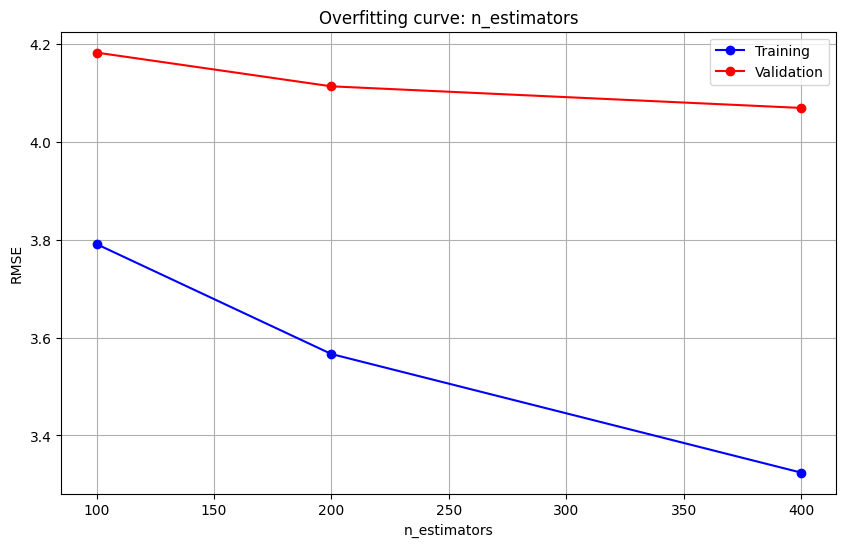

In [172]:
%%time 
test_param_and_plot(XGBRegressor, 'n_estimators', [100, 200, 400], **best_params)

In [175]:
best_params['n_estimators'] = 250

## Max_depth

CPU times: total: 44.6 s
Wall time: 3.09 s


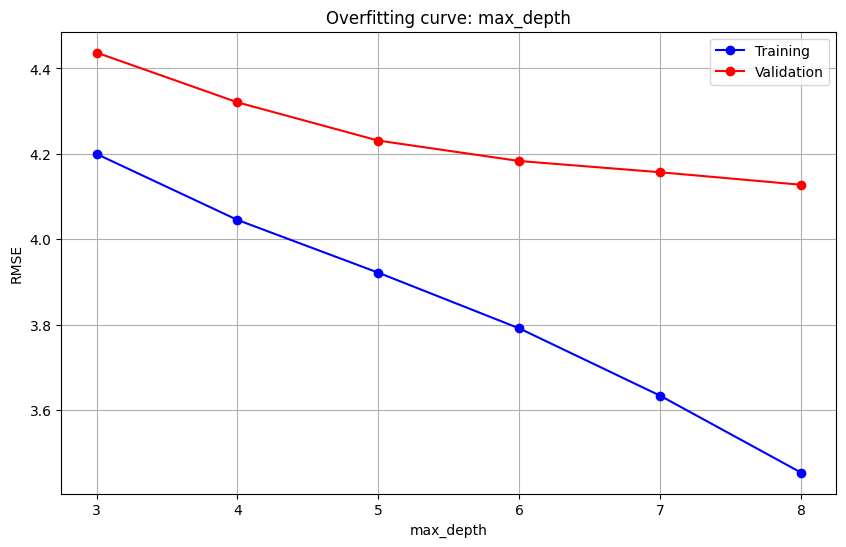

In [174]:
%%time 
test_param_and_plot(XGBRegressor, 'max_depth', [i for i in range(3, 9)], **best_params)

In [177]:
best_params['max_depth'] = 5

### Learning Rate

CPU times: total: 37.8 s
Wall time: 2.81 s


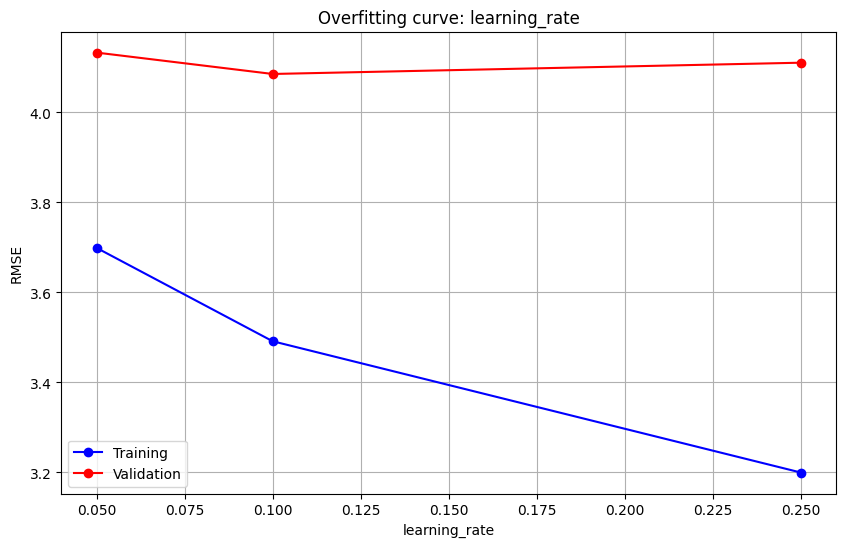

In [178]:
%%time
test_param_and_plot(XGBRegressor, 'learning_rate', [0.05, 0.1, 0.25], **best_params)

In [179]:
best_params['learning_rate'] = 0.25

### Other Parameters

In [191]:
xgb_model_final = XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42,
                               n_estimators=500, max_depth=5, learning_rate=0.1, 
                               subsample=0.7, colsample_bytree=0.7)

In [192]:
%%time
xgb_model_final.fit(train_inputs, train_target)

CPU times: total: 27.6 s
Wall time: 1.85 s


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.7
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [193]:
evaluate(xgb_model_final)

(np.float64(3.3223917834567254),
 np.float64(4.129430299125645),
 np.float64(3.3223917834567254),
 np.float64(4.129430299125645))

In [194]:
predict_and_submit(xgb_model_final, 'data/xgb_tuned_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.482264
1,2015-01-27 13:08:24.0000003,10.972832
2,2011-10-08 11:53:44.0000002,4.505770
3,2012-12-01 21:12:12.0000002,8.610835
4,2012-12-01 21:12:12.0000003,15.308673
...,...,...
9909,2015-05-10 12:37:51.0000002,8.388554
9910,2015-01-12 17:05:51.0000001,11.851648
9911,2015-04-19 20:44:15.0000001,54.875286
9912,2015-01-31 01:05:19.0000005,20.125017


## 10. Document & Publish Your Work

- Add explanations using Markdown
- Clean up the code & create functions
- Publish notebook to Jovian
- Write a blog post and embed

Follow this guide: https://www.youtube.com/watch?v=NK6UYg3-Bxs 